# Data dan sumber data
1. Cacar Air:  https://data.mendeley.com/datasets/dfztdtfsxz/1, https://www.kaggle.com/datasets/sachinkumar413/monkeypox-images-dataset, https://dermnetnz.org/images/varicella-images, dan https://paperswithcode.com/dataset/mcsi
2. Eczema: https://www.kaggle.com/datasets/pacificrm/skindiseasedataset?resource=download
3. Jerawat: https://www.kaggle.com/datasets/pacificrm/skindiseasedataset?resource=download
4. Kudis atau Scabies: https://data.mendeley.com/datasets/yj3md44hxg/1 dan https://www.kaggle.com/datasets/shubhamgoel27/dermnet
5. Kurap atau ringworm: https://www.kaggle.com/datasets/rikimartuaskripsi/skin-diseases-data?select=Ringworm
6. Kutil atau warts: https://www.kaggle.com/datasets/pacificrm/skindiseasedataset?resource=download
7. Lupus: https://www.kaggle.com/datasets/arindamsaha07/skin-diesease-image-dataset
8. Psoriasis: https://www.kaggle.com/datasets/pacificrm/skindiseasedataset?resource=download
9. Rosacea: https://www.kaggle.com/datasets/arindamsaha07/skin-diesease-image-dataset
10. Vitiligo: https://www.kaggle.com/datasets/pacificrm/skindiseasedataset?resource=download


# 1. Data Understanding


### 1.1. Import Library

In [ ]:
# Library umum
import os
import random
import shutil

# Library visualisasi data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image, ImageOps

# Library Deeplearning
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet import preprocess_input
import tf_keras
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix

### 1.2 Download dan Unzip Datasetnya

In [ ]:
# download filenya
! wget https://github.com/CapstoneLAI25SM019/dermacare-skin-disease-classification/raw/main/Dataset.zip

--2025-06-11 06:09:26--  https://github.com/CapstoneLAI25SM019/dermacare-skin-disease-classification/raw/main/Dataset.zip
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/CapstoneLAI25SM019/dermacare-skin-disease-classification/main/Dataset.zip [following]
--2025-06-11 06:09:27--  https://media.githubusercontent.com/media/CapstoneLAI25SM019/dermacare-skin-disease-classification/main/Dataset.zip
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 349967019 (334M) [application/zip]
Saving to: ‘Dataset.zip’

Dataset.zip         100%[===================>] 333.75M   152MB/s    in 2.2s    


In [ ]:
# unzip Filenya
! unzip /content/Dataset.zip

Archive:  /content/Dataset.zip
   creating: Dataset/
   creating: Dataset/Cacar Air/
  inflating: Dataset/Cacar Air/Cacar air 1.jpg  
  inflating: Dataset/Cacar Air/Cacar air 10.jpg  
  inflating: Dataset/Cacar Air/Cacar air 11.jpg  
  inflating: Dataset/Cacar Air/Cacar air 12.jpg  
  inflating: Dataset/Cacar Air/Cacar air 13.jpeg  
  inflating: Dataset/Cacar Air/Cacar air 2.jpeg  
  inflating: Dataset/Cacar Air/Cacar air 3.jpg  
  inflating: Dataset/Cacar Air/Cacar air 4.jpg  
  inflating: Dataset/Cacar Air/Cacar air 5.jpg  
  inflating: Dataset/Cacar Air/Cacar air 6.jpg  
  inflating: Dataset/Cacar Air/Cacar air 7.jpg  
  inflating: Dataset/Cacar Air/Cacar air 8.jpg  
  inflating: Dataset/Cacar Air/Cacar air 9.jpg  
  inflating: Dataset/Cacar Air/ChickenPox (10).jpeg  
  inflating: Dataset/Cacar Air/ChickenPox (10).jpg  
  inflating: Dataset/Cacar Air/ChickenPox (10).png  
  inflating: Dataset/Cacar Air/ChickenPox (100).jpg  
  inflating: Dataset/Cacar Air/ChickenPox (101).jpg  
  in

In [ ]:
#Folder asli dataset
original_dir = 'Dataset'

#Folder baru untuk dataset yang sudah dibersihkan dan diproses
#os.makedirs(name='dataset_cleaned', exist_ok=True)
cleaned_dir = 'dataset_cleaned'

#Folder tujuan dataset yang sudah dibagi
#os.makedirs(name='dataset_split', exist_ok=True)
split_dir = 'dataset_split'

Mengecek isi folder: Dataset

🔹 Kelas 'Cacar Air': 400 gambar
🔹 Kelas 'Eczema': 541 gambar
🔹 Kelas 'Jerawat': 586 gambar
🔹 Kelas 'Kudis': 420 gambar
🔹 Kelas 'Kurap': 400 gambar
🔹 Kelas 'Kutil': 552 gambar
🔹 Kelas 'Lupus': 485 gambar
🔹 Kelas 'Psoriasis': 622 gambar
🔹 Kelas 'Rosacea': 400 gambar
🔹 Kelas 'Vitiligo': 401 gambar

 Total seluruh gambar: 4807


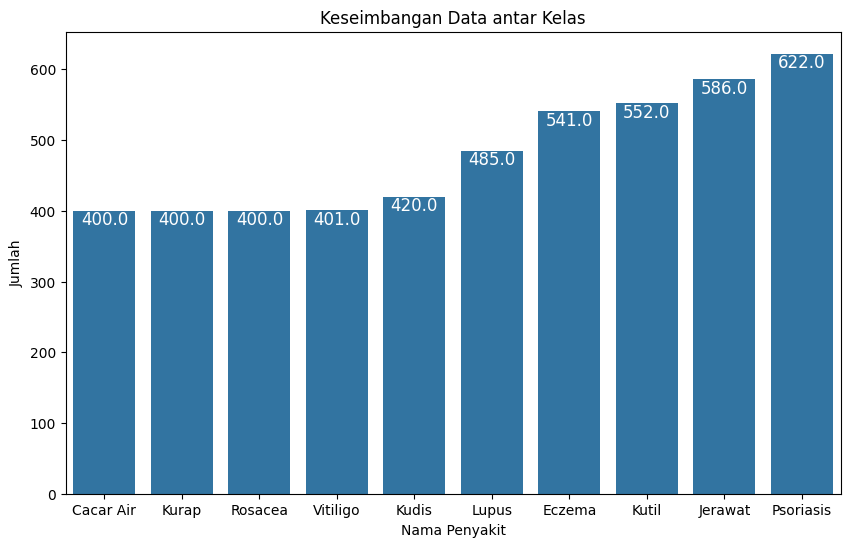

In [ ]:
#format file gambar yang diakui
image_extensions = ('.jpg', '.jpeg', '.png')

total_images = 0
class_names_data = {}
print(f"Mengecek isi folder: {original_dir}\n")

for class_name in sorted(os.listdir(original_dir)):
    class_path = os.path.join(original_dir, class_name)
    if not os.path.isdir(class_path):
        continue

    image_files = [f for f in os.listdir(class_path) if f.lower().endswith(image_extensions)]
    count = len(image_files)
    total_images += count
    class_names_data[class_name] = count
    print(f"🔹 Kelas '{class_name}': {count} gambar")

print(f"\n Total seluruh gambar: {total_images}")

#Visualisasi keseimbangan Data
dataset_df = pd.DataFrame(list(class_names_data.items()), columns=['Kelas', 'Jumlah']).sort_values(by='Jumlah')

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=dataset_df, x='Kelas', y='Jumlah')
for p in ax.patches:
  plt.text(x=p.get_x() + p.get_width()/2,
           y=p.get_height(),
           s=f'{p.get_height()}',
           ha='center',
           va='top',
           color='white',
           size=12)
plt.xlabel('Nama Penyakit')
plt.ylabel('Jumlah')
plt.title('Keseimbangan Data antar Kelas')
plt.show()

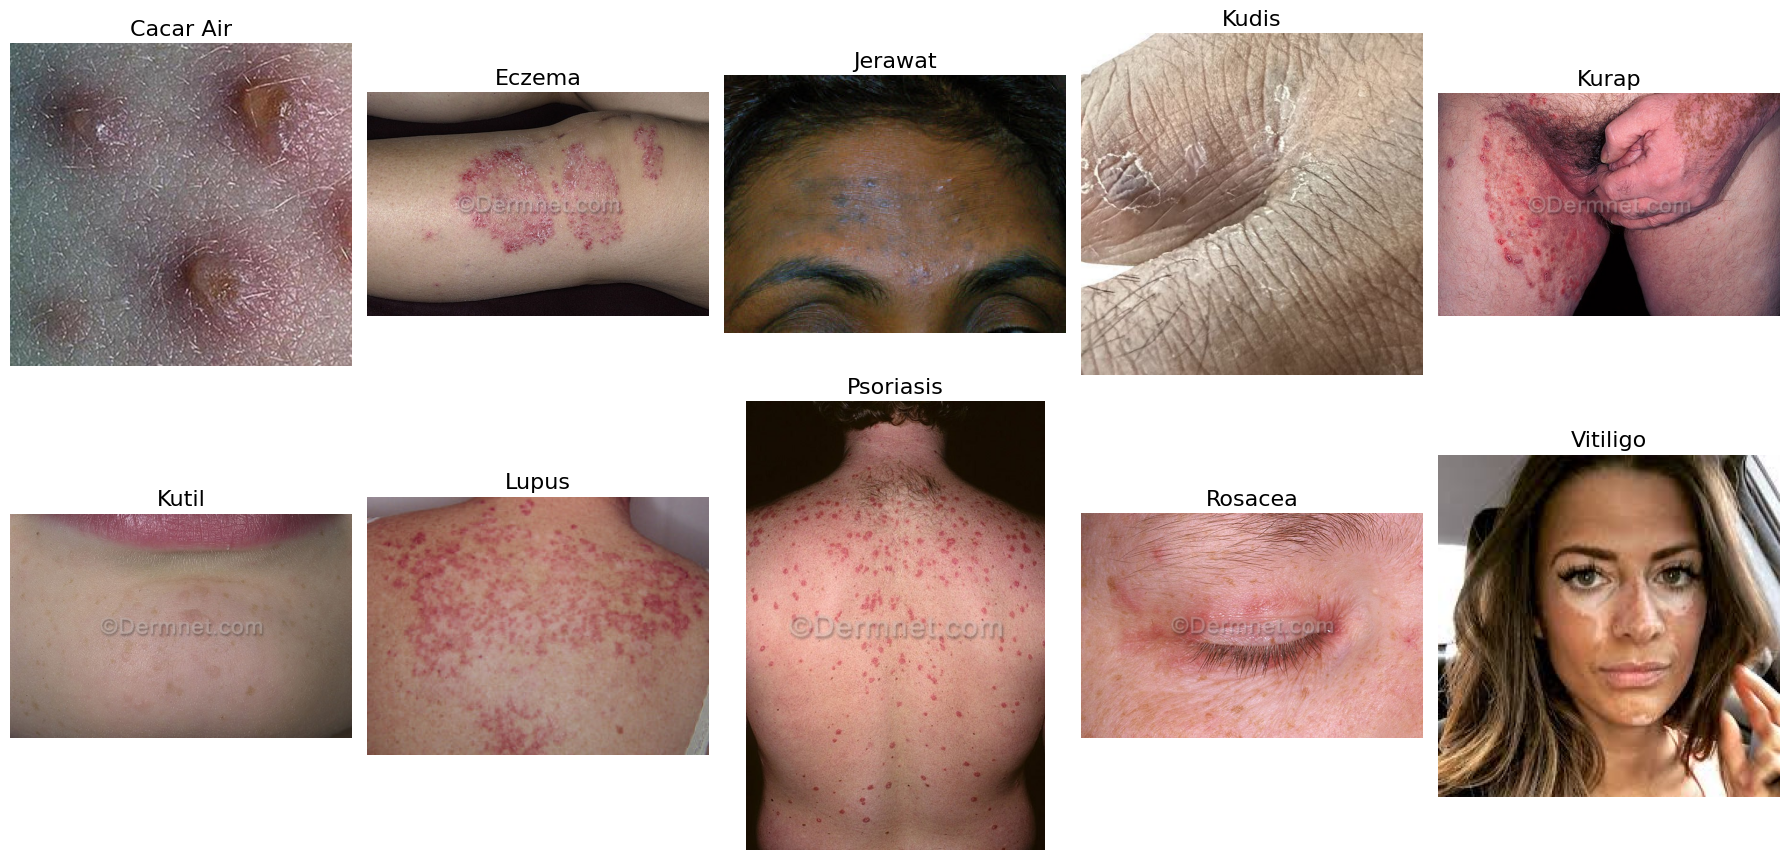

In [ ]:
#menunjukkan salah satu gambar dari setiap kelas

#mengambil semua nama kelas
class_names = sorted([d for d in os.listdir(original_dir) if os.path.isdir(os.path.join(original_dir, d))])

#membuat kamus yang menyimpan daftar file gambar per kelas
class_images = {
    class_name: os.listdir(os.path.join(original_dir, class_name))
    for class_name in class_names
}

#menentukan ukuran grid
cols = 5
rows = int(np.ceil(len(class_names) / cols))

#Plot
fig, axs = plt.subplots(rows, cols, figsize=(18, 9))
axs = axs.flatten()

for idx, class_name in enumerate(class_names):
    image_list = class_images[class_name]
    if len(image_list) == 0:
        continue  #skip kelas yang kosong
    img_file = np.random.choice(image_list)
    img_path = os.path.join(original_dir, class_name, img_file)

    try:
        img = Image.open(img_path).convert("RGB")
        axs[idx].imshow(img)
        axs[idx].set_title(class_name, fontsize=16)
        axs[idx].axis('off')
    except:
        axs[idx].axis('off')  #skip jika ada error buka gambar

#mengosongkan axis yang tidak terpakai
for i in range(len(class_names), len(axs)):
    axs[i].axis('off')

plt.tight_layout()
plt.show()

# 2. Data Preparation


 Memulai proses pembersihan dan resize dataset...

 Dataset selesai dibersihkan dan disimpan di: dataset_cleaned

 Menampilkan gambar hasil cleaning dari masing-masing kelas...


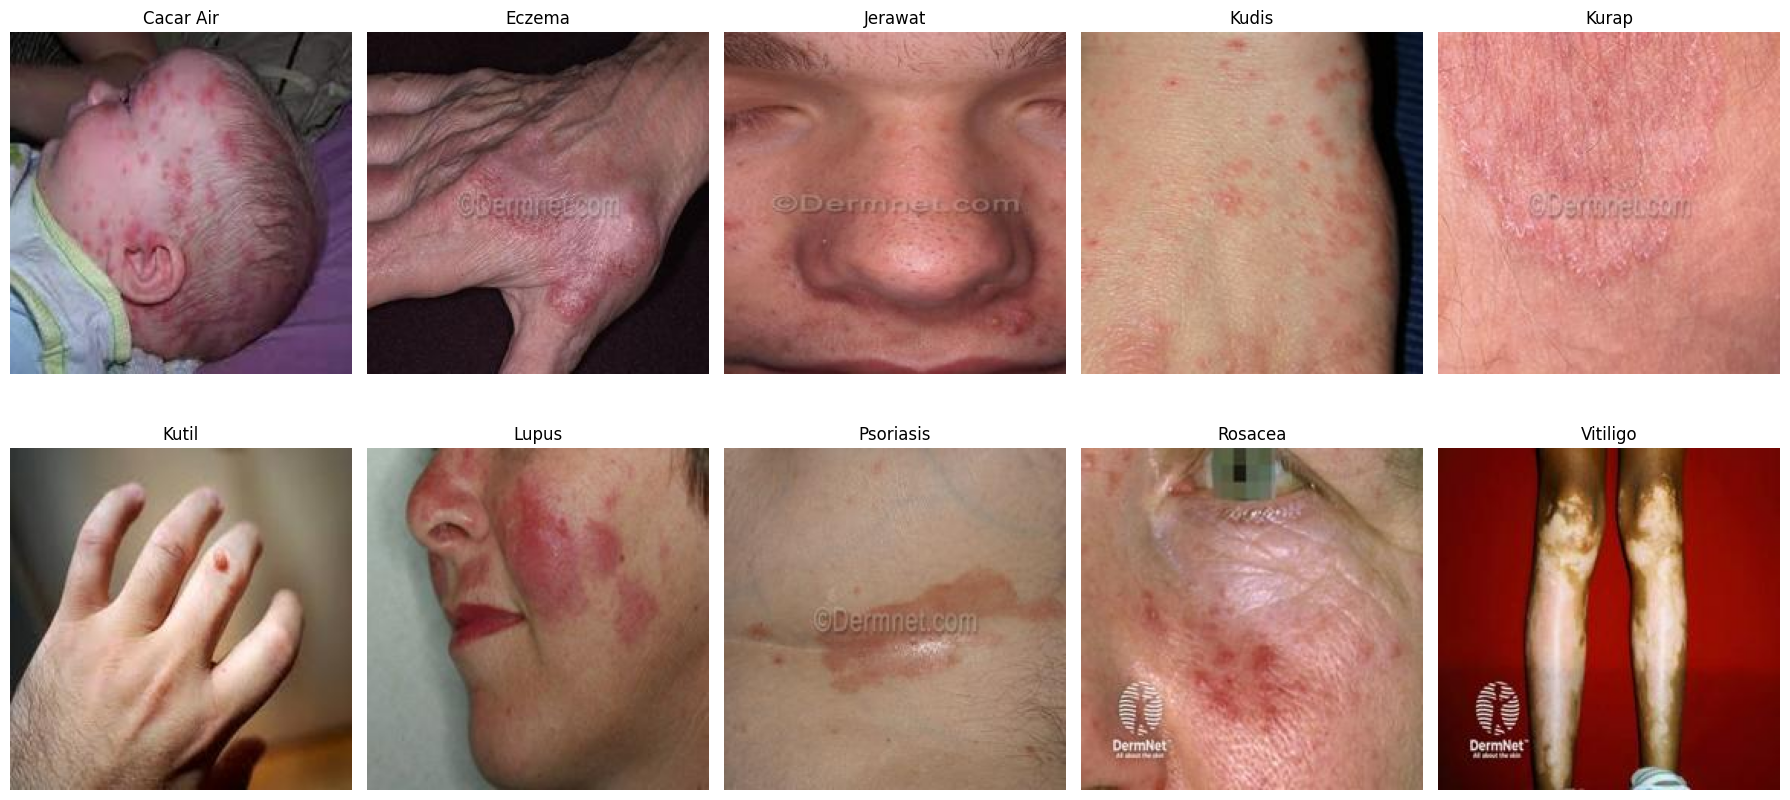

In [ ]:
os.makedirs(cleaned_dir, exist_ok=True)

image_size = (224, 224)
cleaned_images = {}

print("\n Memulai proses pembersihan dan resize dataset...")

# Loop tiap kelas
for class_name in sorted(os.listdir(original_dir)):
    class_path = os.path.join(original_dir, class_name)
    if not os.path.isdir(class_path):
        continue

    cleaned_class_path = os.path.join(cleaned_dir, class_name)
    os.makedirs(cleaned_class_path, exist_ok=True)

    image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    if not image_files:
        print(f"Tidak ada gambar ditemukan di kelas: {class_name}")
        continue

    for file in image_files:
        src = os.path.join(class_path, file)
        dst = os.path.join(cleaned_class_path, file)

        try:
            with Image.open(src) as img:
                cleaned = img.convert('RGB').resize(image_size)
                cleaned.save(dst)

        except Exception as e:
            print(f"Gagal memproses {src}: {e}")

    # Simpan satu contoh gambar yang sudah dibersihkan
    example_file = image_files[0]
    example_path = os.path.join(cleaned_class_path, example_file)
    try:
        with Image.open(example_path) as img:
            cleaned_images[class_name] = img.copy()
    except:
        print(f"Gagal membuka gambar contoh dari {example_path}")

print("\n Dataset selesai dibersihkan dan disimpan di:", cleaned_dir)

# ==== Visualisasi hasil cleaning ====
print("\n Menampilkan gambar hasil cleaning dari masing-masing kelas...")

cols = 5
rows = int(np.ceil(len(cleaned_images) / cols))
fig, axs = plt.subplots(rows, cols, figsize=(18, 9))
axs = axs.flatten()

for idx, (class_name, img) in enumerate(cleaned_images.items()):
    axs[idx].imshow(img)
    axs[idx].set_title(class_name, fontsize=12)
    axs[idx].axis('off')

# Kosongkan sisa grid
for i in range(len(cleaned_images), len(axs)):
    axs[i].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
#Membuat folder split
for split in ['train', 'val', 'test']:
    os.makedirs(os.path.join(split_dir, split), exist_ok=True)

#Split dataset
print(" Membagi dataset ke train, val, test...")
for class_name in sorted(os.listdir(cleaned_dir)):
    class_path = os.path.join(cleaned_dir, class_name)
    if not os.path.isdir(class_path):
        continue

    images = sorted([f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.png', '.jpeg'))])
    if len(images) < 3:
        continue  #minimal 3 untuk bisa di-split
    random.seed(101)
    random.shuffle(images)
    n_total = len(images)
    n_train = int(0.8 * n_total)
    n_val = int(0.1 * n_total)

    splits = {
        'train': images[:n_train],
        'val': images[n_train:n_train + n_val],
        'test': images[n_train + n_val:]
    }

    for split, files in splits.items():
        split_class_path = os.path.join(split_dir, split, class_name)
        os.makedirs(split_class_path, exist_ok=True)
        for file in files:
            shutil.copy(os.path.join(class_path, file), os.path.join(split_class_path, file))

print(" Split selesai.\n")

 Membagi dataset ke train, val, test...
 Split selesai.



In [ ]:
#Augmentasi hanya pada train
print("Menyiapkan augmentasi untuk data training... \n")
train_dir = os.path.join(split_dir, 'train')
val_dir = os.path.join(split_dir, 'val')
test_dir = os.path.join(split_dir, 'test')

target_size = (224, 224)
batch_size = 32  #agar kita bisa ambil satu-satu per kelas

train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    zoom_range=0.25,
    width_shift_range=0.25,
    height_shift_range=0.25,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    shear_range=0.1,
    fill_mode='reflect',
)

val_gen = ImageDataGenerator(rescale=1./255)
test_gen = ImageDataGenerator(rescale=1./255)

train_flow = train_gen.flow_from_directory(train_dir, target_size=target_size, batch_size=batch_size, class_mode='categorical', shuffle=True)
val_flow = val_gen.flow_from_directory(val_dir, target_size=target_size, batch_size=batch_size, class_mode='categorical', shuffle=False)
test_flow = test_gen.flow_from_directory(test_dir, target_size=target_size, batch_size=batch_size, class_mode='categorical', shuffle=False)

Menyiapkan augmentasi untuk data training... 

Found 3842 images belonging to 10 classes.
Found 479 images belonging to 10 classes.
Found 486 images belonging to 10 classes.


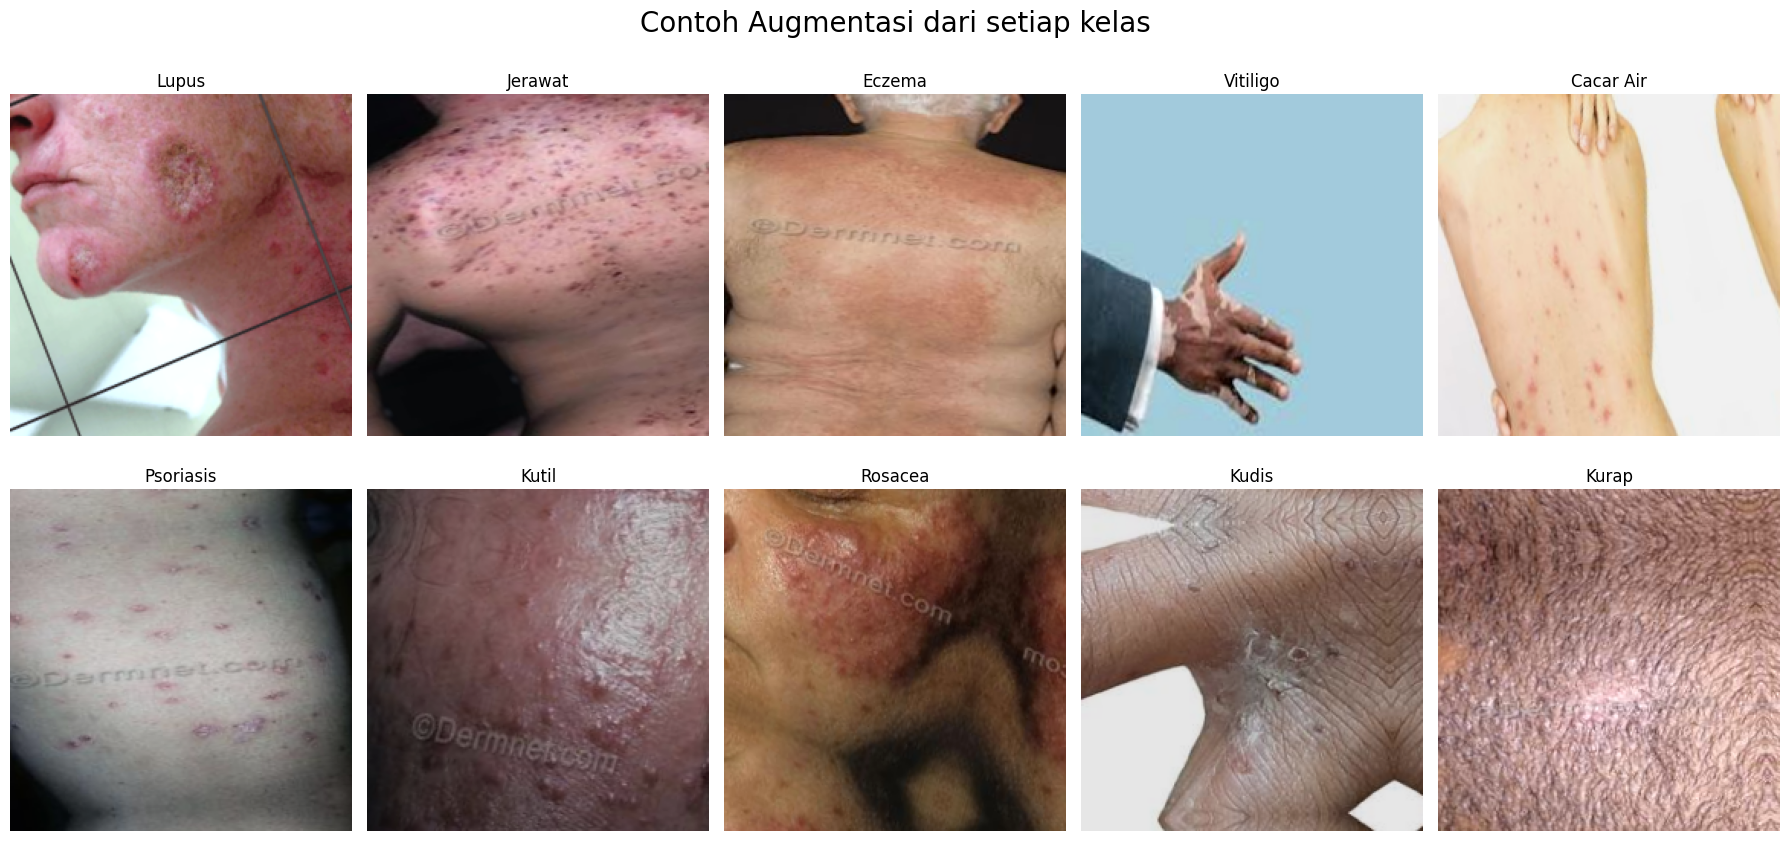

In [ ]:
#Menampilkan 1 contoh dari tiap kelas hasil augmentasi

#Mengambil image dan labelnya serta mapping ke labelnya
train_images, train_labels = next(train_flow)
class_name_dict = train_flow.class_indices
inverse_class_name_dict = {value:key for key,value in class_name_dict.items()}

#Menyimpan index dari setiap kelas
shown_classes = set()
selected_indices = []

for i in range(len(train_labels)):
  labels = np.argmax(train_labels[i])
  if labels not in shown_classes:
    selected_indices.append(i)
    shown_classes.add(labels)
  if len(shown_classes) == len(inverse_class_name_dict):
    break

#Plot 10 gambar (1 per kelas)
plt.figure(figsize=(18, 9))
for i, image in enumerate(selected_indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(train_images[image])
    label_image = np.argmax(train_labels[image])
    label_name = inverse_class_name_dict[label_image]
    plt.title(label_name)
    plt.axis('off')

plt.suptitle('Contoh Augmentasi dari setiap kelas', size=20)
plt.tight_layout()
plt.show()

# 3. Modeling

## 3.1 Membangun Baseline Model
- Baseline dibangun mengikuti CNN explainer website dengan link dibawah ini :

  [Referensi Baseline Model](https://poloclub.github.io/cnn-explainer/)

In [ ]:
model_base = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(224,224,3)),
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu'),
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu'),
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')

])

model_base.compile(optimizer=tf.keras.optimizers.Adam(),
                   loss=tf.keras.losses.CategoricalCrossentropy(),
                   metrics=['accuracy'])

model_base.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │       280,910 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 283,920 (1.08 MB)

 Trainable params: 283,920 (1.08 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Latih Modelnya
history_base = model_base.fit(train_flow,
                              epochs=10,
                              steps_per_epoch=len(train_flow),
                              validation_data=val_flow,
                              validation_steps=len(val_flow))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 67s 502ms/step - accuracy: 0.1624 - loss: 2.2367 - val_accuracy: 0.1858 - val_loss: 2.1731
Epoch 2/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 55s 457ms/step - accuracy: 0.2260 - loss: 2.1300 - val_accuracy: 0.2568 - val_loss: 2.0784
Epoch 3/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 82s 454ms/step - accuracy: 0.2435 - loss: 2.0488 - val_accuracy: 0.2797 - val_loss: 2.0195
Epoch 4/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 54s 446ms/step - accuracy: 0.2476 - loss: 2.0340 - val_accuracy: 0.2985 - val_loss: 1.9631
Epoch 5/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 83s 455ms/step - accuracy: 0.2833 - loss: 1.9913 - val_accuracy: 0.3027 - val_loss: 1.9474
Epoch 6/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 56s 463ms/step - accuracy: 0.2756 - loss: 1.9726 - val_accuracy: 0.3111 - val_loss: 1.9059
Epoch 7/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 81s 453ms/step - accuracy: 0.2852 - loss: 1.9295 - val_accuracy: 0.3132 - val_loss: 1.9158
Epoch 8/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 81s 444ms/step - accuracy: 0.2912 - loss: 1

In [ ]:
def plot_evaluation_model(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  epoch = len(loss)

  plt.figure()
  plt.plot(range(epoch), loss, label='Training Loss')
  plt.plot(range(epoch), val_loss, label='Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

  plt.figure()
  plt.plot(range(epoch), acc, label='Training Accuracy')
  plt.plot(range(epoch), val_acc, label='Validation Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()

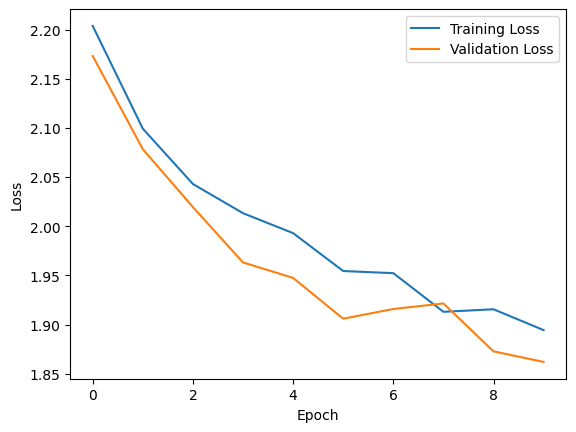

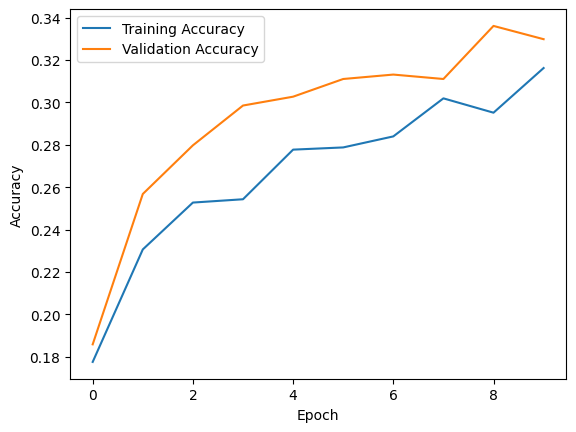

In [ ]:
plot_evaluation_model(history_base)

## 3.2 Modified Model
- Pada pembangunan model kali ini dilakukan penyesuaian dari jumlah layer dan hyperparameter lainnya

In [ ]:
# Membangun Arsitektur Model
model_modified = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224, 224, 3)),

    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Melakukan Kompilasi Model
model_modified.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
                       loss=tf.keras.losses.CategoricalCrossentropy(),
                       metrics=['accuracy'])

model_modified.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 224, 224, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 112, 112, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 56, 56, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 56, 56, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │    25,690,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,127,530 (99.67 MB)

 Trainable params: 26,127,530 (99.67 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# terapkan beberapa callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, mode='min', restore_best_weights=True, verbose=1)

# Pemberian bobot pada kelas gak seimbang
labels_int = train_flow.labels
class_weights = compute_class_weight('balanced', classes=np.unique(labels_int), y=labels_int)
class_weights_dict = dict(enumerate(class_weights))

# Latih Modelnya
history_modified = model_modified.fit(train_flow,
                                      epochs=100,
                                      steps_per_epoch=len(train_flow),
                                      validation_data=val_flow,
                                      validation_steps=len(val_flow),
                                      callbacks=[early_stopping],
                                      class_weight=class_weights_dict)

Epoch 1/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 84s 568ms/step - accuracy: 0.0966 - loss: 2.2903 - val_accuracy: 0.1733 - val_loss: 2.2028
Epoch 2/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 120s 496ms/step - accuracy: 0.1569 - loss: 2.1947 - val_accuracy: 0.2171 - val_loss: 2.1269
Epoch 3/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 81s 485ms/step - accuracy: 0.1941 - loss: 2.1214 - val_accuracy: 0.2693 - val_loss: 2.0694
Epoch 4/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 60s 496ms/step - accuracy: 0.2316 - loss: 2.0552 - val_accuracy: 0.2756 - val_loss: 1.9801
Epoch 5/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 81s 486ms/step - accuracy: 0.2500 - loss: 2.0006 - val_accuracy: 0.2839 - val_loss: 1.9624
Epoch 6/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 58s 478ms/step - accuracy: 0.2564 - loss: 1.9893 - val_accuracy: 0.3090 - val_loss: 1.9109
Epoch 7/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 58s 478ms/step - accuracy: 0.2886 - loss: 1.9308 - val_accuracy: 0.3152 - val_loss: 1.8572
Epoch 8/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 60s 496ms/step - accuracy: 0.3076 

In [ ]:
# Mengevalusasi Model dengan Data Uji
loss, acc = model_modified.evaluate(test_flow)
print(f'Hasil Akurasi model adalah {acc:.3f} dengan loss {loss:.3f} pada data uji')

 1/16 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.7812 - loss: 0.6843

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 146ms/step - accuracy: 0.6272 - loss: 1.0826
Hasil Akurasi model adalah 0.595 dengan loss 1.173 pada data uji


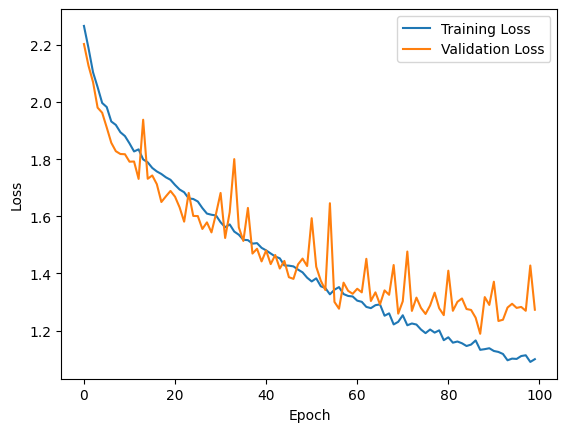

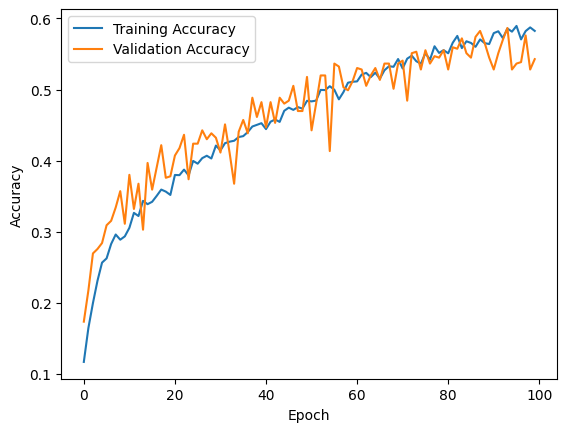

In [ ]:
# Visualisasi Akurasi dan Loss
plot_evaluation_model(history_modified)

## 3.3 Transfer Learning
- Adapun jenis model yang dipakai untuk transfer learning yaitu Mobile Net

In [ ]:
# Melakukan augmentasi pada pada train lagi khusus untul transfer learning
batch_size = 16

train_gen = ImageDataGenerator(
    preprocessing_function = tf.keras.applications.mobilenet.preprocess_input,
    rotation_range=15,
    zoom_range=0.15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode='reflect',
)

val_gen = ImageDataGenerator(preprocessing_function = tf.keras.applications.mobilenet.preprocess_input)
test_gen = ImageDataGenerator(preprocessing_function = tf.keras.applications.mobilenet.preprocess_input)

train_flow = train_gen.flow_from_directory(train_dir,
                                           target_size=image_size,
                                           batch_size=batch_size,
                                           class_mode='categorical',
                                           shuffle=True)
val_flow = val_gen.flow_from_directory(val_dir,
                                       target_size=image_size,
                                       batch_size=batch_size,
                                       class_mode='categorical',
                                       shuffle=False)
test_flow = test_gen.flow_from_directory(test_dir,
                                         target_size=image_size,
                                         batch_size=batch_size,
                                         class_mode='categorical',
                                         shuffle=False)

Found 3845 images belonging to 10 classes.
Found 481 images belonging to 10 classes.
Found 481 images belonging to 10 classes.


### 3.1 Transfer Learning - Feature Extraction

In [ ]:
# Mengambil Feauture dari model pre-trained
pre_train_model = tf.keras.applications.MobileNet(include_top=False, input_shape=(224,224,3))
pre_train_model.trainable = False

# Membuat Arsitektur Model
mobile_net_model = tf.keras.models.Sequential([
                        tf.keras.layers.Input(shape=(224, 224, 3)),
                        pre_train_model,
                        tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same'),
                        tf.keras.layers.ReLU(),
                        tf.keras.layers.MaxPool2D(pool_size=2),

                        tf.keras.layers.DepthwiseConv2D(kernel_size=3, padding='same'),
                        tf.keras.layers.ReLU(),
                        tf.keras.layers.Conv2D(filters=256, kernel_size=1, padding='same'),
                        tf.keras.layers.ReLU(),
                        tf.keras.layers.MaxPool2D(pool_size=2),

                        tf.keras.layers.GlobalAveragePooling2D(),
                        tf.keras.layers.Dense(units=128, activation='relu'),
                        tf.keras.layers.Dropout(0.5),
                        tf.keras.layers.Dense(units=10, activation='softmax')
                      ])

# Melakukan kompilasi Model
mobile_net_model.compile(loss=tf.keras.losses.CategoricalFocalCrossentropy(),
                           optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                           metrics=['accuracy'])

mobile_net_model.summary()

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_224 (Functional) │ (None, 7, 7, 1024)     │     3,228,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 7, 7, 128)      │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d                │ (None, 3, 3, 128)      │         1,280 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 3, 3, 256)      │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,477,130 (17.08 MB)

 Trainable params: 1,248,266 (4.76 MB)

 Non-trainable params: 3,228,864 (12.32 MB)

In [ ]:
# Pemberian bobot pada kelas tidak seimbang
labels_int = train_flow.labels
class_weights = compute_class_weight('balanced', classes=np.unique(labels_int), y=labels_int)
class_weights_dict = dict(enumerate(class_weights))

# Latih Modelnya
initial_epochs = 25
history_pre_fine_tune = mobile_net_model.fit(train_flow,
                                             epochs=initial_epochs,
                                             steps_per_epoch=len(train_flow),
                                             validation_data=val_flow,
                                             validation_steps=len(val_flow),
                                             class_weight=class_weights_dict)

Epoch 1/25
241/241 ━━━━━━━━━━━━━━━━━━━━ 70s 260ms/step - accuracy: 0.1905 - loss: 0.4324 - val_accuracy: 0.4802 - val_loss: 0.2757
Epoch 2/25
241/241 ━━━━━━━━━━━━━━━━━━━━ 71s 224ms/step - accuracy: 0.4228 - loss: 0.2736 - val_accuracy: 0.5551 - val_loss: 0.1966
Epoch 3/25
241/241 ━━━━━━━━━━━━━━━━━━━━ 82s 225ms/step - accuracy: 0.5106 - loss: 0.2152 - val_accuracy: 0.5988 - val_loss: 0.1739
Epoch 4/25
241/241 ━━━━━━━━━━━━━━━━━━━━ 54s 225ms/step - accuracy: 0.5524 - loss: 0.1839 - val_accuracy: 0.6320 - val_loss: 0.1540
Epoch 5/25
241/241 ━━━━━━━━━━━━━━━━━━━━ 53s 221ms/step - accuracy: 0.5972 - loss: 0.1645 - val_accuracy: 0.6507 - val_loss: 0.1474
Epoch 6/25
241/241 ━━━━━━━━━━━━━━━━━━━━ 54s 223ms/step - accuracy: 0.6384 - loss: 0.1469 - val_accuracy: 0.6694 - val_loss: 0.1377
Epoch 7/25
241/241 ━━━━━━━━━━━━━━━━━━━━ 83s 229ms/step - accuracy: 0.6431 - loss: 0.1428 - val_accuracy: 0.6736 - val_loss: 0.1389
Epoch 8/25
241/241 ━━━━━━━━━━━━━━━━━━━━ 53s 219ms/step - accuracy: 0.6724 - loss: 0

### 3.3.2 Transfer Learning - Fine Tuning

In [ ]:
# Unfreeze layer agar dapat dilatih dengan dataset yang ada
pre_train_model.trainable = True
for layer in pre_train_model.layers[:-30]:
  layer.trainable = False

# Melakukan kompilasi Model
mobile_net_model.compile(loss=tf.keras.losses.CategoricalFocalCrossentropy(),
                           optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
                           metrics=['accuracy'])

In [ ]:
# terapkan beberapa callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=12, mode='min', restore_best_weights=True, verbose=1)

# Pemberian bobot pada kelas gak seimbang
labels_int = train_flow.labels
class_weights = compute_class_weight('balanced', classes=np.unique(labels_int), y=labels_int)
class_weights_dict = dict(enumerate(class_weights))


# Latih Modelnya
history_fine_tune = mobile_net_model.fit(train_flow,
                                         epochs=initial_epochs+50,
                                         steps_per_epoch=len(train_flow),
                                         validation_data=val_flow,
                                         validation_steps=len(val_flow),
                                         callbacks=[early_stopping],
                                         class_weight=class_weights_dict,
                                         initial_epoch=history_pre_fine_tune.epoch[-1])

Epoch 25/75
241/241 ━━━━━━━━━━━━━━━━━━━━ 78s 266ms/step - accuracy: 0.7151 - loss: 0.1178 - val_accuracy: 0.6757 - val_loss: 0.1377
Epoch 26/75
241/241 ━━━━━━━━━━━━━━━━━━━━ 57s 234ms/step - accuracy: 0.7283 - loss: 0.1035 - val_accuracy: 0.7069 - val_loss: 0.1310
Epoch 27/75
241/241 ━━━━━━━━━━━━━━━━━━━━ 81s 230ms/step - accuracy: 0.7254 - loss: 0.1082 - val_accuracy: 0.6985 - val_loss: 0.1278
Epoch 28/75
241/241 ━━━━━━━━━━━━━━━━━━━━ 55s 229ms/step - accuracy: 0.7510 - loss: 0.0878 - val_accuracy: 0.7214 - val_loss: 0.1241
Epoch 29/75
241/241 ━━━━━━━━━━━━━━━━━━━━ 85s 241ms/step - accuracy: 0.7670 - loss: 0.0873 - val_accuracy: 0.7193 - val_loss: 0.1203
Epoch 30/75
241/241 ━━━━━━━━━━━━━━━━━━━━ 79s 229ms/step - accuracy: 0.7625 - loss: 0.0867 - val_accuracy: 0.7464 - val_loss: 0.1199
Epoch 31/75
241/241 ━━━━━━━━━━━━━━━━━━━━ 56s 233ms/step - accuracy: 0.7901 - loss: 0.0756 - val_accuracy: 0.7318 - val_loss: 0.1180
Epoch 32/75
241/241 ━━━━━━━━━━━━━━━━━━━━ 58s 240ms/step - accuracy: 0.8116 -

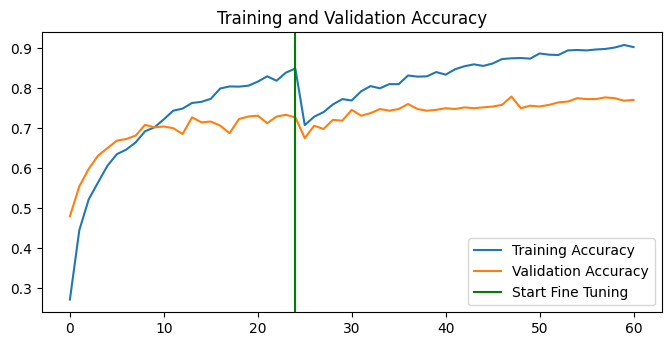

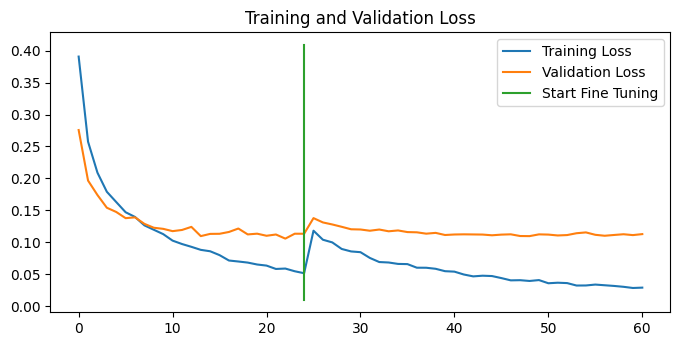

In [ ]:
# Visualisasi Akurasi dan Loss Transfer Learning Mobile Net
def evaluate_combination_plot(history_pre_tune, history_tune, initial_epoch=25):
  loss = history_pre_tune.history['loss'] + history_tune.history['loss']
  val_loss = history_pre_tune.history['val_loss'] + history_tune.history['val_loss']
  acc = history_pre_tune.history['accuracy'] + history_tune.history['accuracy']
  val_acc = history_pre_tune.history['val_accuracy'] + history_tune.history['val_accuracy']

  # Plot akurasinya
  plt.figure(figsize=(8,8))
  plt.subplot(2,1,1)
  plt.plot(acc, label='Training Accuracy')        # Catatan kecil --> Tidak perlu sumbu x, matplotlib otomatis pakai index sebagai x (0, 1, 2, ...)
  plt.plot(val_acc, label='Validation Accuracy')
  plt.axvline(initial_epoch-1, label='Start Fine Tuning', color='green')
  plt.legend()
  plt.title('Training and Validation Accuracy')

  # Plot lossnya
  plt.figure(figsize=(8,8))
  plt.subplot(2,1,2)
  plt.plot(loss, label='Training Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.plot([initial_epoch-1,initial_epoch-1], plt.ylim(), label='Start Fine Tuning')    # alternatif lain untuk membuat garis lurus vertikal harus sesuai tempatnya ya dengan bantuan ylim untuk mennetukan tinggi grafik
  plt.legend()
  plt.title('Training and Validation Loss')

evaluate_combination_plot(history_pre_fine_tune, history_fine_tune)

In [ ]:
# Simpan Modelnya
mobile_net_model.save('model_klasifikasi_kulit.h5')

/usr/local/lib/python3.11/dist-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# **4. Evaluasi Model pada Data Test**

In [ ]:
# Memuat model terbaik
model = load_model('model_klasifikasi_kulit.h5')
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_224 (Functional) │ (None, 7, 7, 1024)     │     3,228,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 7, 7, 128)      │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d                │ (None, 3, 3, 128)      │         1,280 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 3, 3, 256)      │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,477,132 (17.08 MB)

 Trainable params: 4,455,242 (17.00 MB)

 Non-trainable params: 21,888 (85.50 KB)

 Optimizer params: 2 (12.00 B)

In [ ]:
target_size = (224, 224)
test_dir = os.path.join(split_dir, 'test')

def preprocessing_image(test_dir):
    images = []
    labels = []

    for class_name in os.listdir(test_dir):
        class_path = os.path.join(test_dir, class_name)
        if os.path.isdir(class_path):
            for img in os.listdir(class_path):
                image_path = os.path.join(class_path, img)
                img = Image.open(image_path)
                img_test = img.convert('RGB').resize(target_size)
                img_test = np.array(img)
                # img_test = np.expand_dims(img_test, axis=0)
                img_test = img_test / 255

                images.append(img_test)
                labels.append(class_name)

    return np.array(images), labels

In [ ]:
test_images, test_labels = preprocessing_image(test_dir)

print(f"Jumlah gambar yang dimuat: {len(test_images)}")
print(f"Dimensi gambar pertama: {test_images.shape}")

Jumlah gambar yang dimuat: 486
Dimensi gambar pertama: (486, 224, 224, 3)


In [ ]:
# Konversi ke NumPy array
test_images_array = np.array(test_images)
test_labels_array = np.array(test_labels)

print(f"Range nilai piksel test_images: {test_images_array.min()} - {test_images_array.max()}")

Range nilai piksel test_images: 0.0 - 1.0


In [ ]:
# Mengambil image dan labelnya serta mapping ke labelnya
class_name_dict = test_flow.class_indices
inverse_class_name_dict = {value: key for key, value in class_name_dict.items()}
test_labels_num = [class_name_dict[label] for label in test_labels] # Konversi label menjadi numerik

test_labels_one_hot = to_categorical(test_labels_num, num_classes=len(class_name_dict))

In [ ]:
# Evaluasi pada dataset test
test_loss, test_accuracy = model.evaluate(test_images, test_labels_one_hot)
print(f'Hasil Akurasi model adalah {test_accuracy:.3f} dengan loss {test_loss:.3f} pada data uji')

16/16 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.7920 - loss: 0.8610
Hasil Akurasi model adalah 0.807 dengan loss 0.741 pada data uji


In [ ]:
actual_labels = [inverse_class_name_dict[label] for label in test_labels_num]

# Melakukan prediksi
predictions = model.predict(test_images)
predicted_classes = [np.argmax(predict) for predict in predictions]

predicted_labels = [inverse_class_name_dict[label] for label in predicted_classes]

# Menyimpan hasil prediksi ke dalam CSV
result = pd.DataFrame({'Actual label': actual_labels, 'Predicted label': predicted_labels})
result.to_csv('hasil_prediksi.csv', index=False)

# Menampilkan beberapa hasil prediksi
for i in range(10):
    print(f'Actual: {actual_labels[i]}, Predicted: {predicted_labels[i]}')

16/16 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step
Actual: Lupus, Predicted: Lupus
Actual: Lupus, Predicted: Lupus
Actual: Lupus, Predicted: Lupus
Actual: Lupus, Predicted: Lupus
Actual: Lupus, Predicted: Lupus
Actual: Lupus, Predicted: Kurap
Actual: Lupus, Predicted: Lupus
Actual: Lupus, Predicted: Lupus
Actual: Lupus, Predicted: Lupus
Actual: Lupus, Predicted: Lupus


Classification Report:               precision    recall  f1-score   support

   Cacar Air       0.79      0.93      0.85        40
      Eczema       0.68      0.73      0.70        55
     Jerawat       0.83      0.82      0.82        60
       Kudis       0.93      0.90      0.92        42
       Kurap       0.63      0.72      0.67        40
       Kutil       0.83      0.80      0.82        56
       Lupus       0.88      0.78      0.83        49
   Psoriasis       0.79      0.70      0.74        63
     Rosacea       0.81      0.85      0.83        40
    Vitiligo       0.97      0.93      0.95        41

    accuracy                           0.81       486
   macro avg       0.81      0.82      0.81       486
weighted avg       0.81      0.81      0.81       486



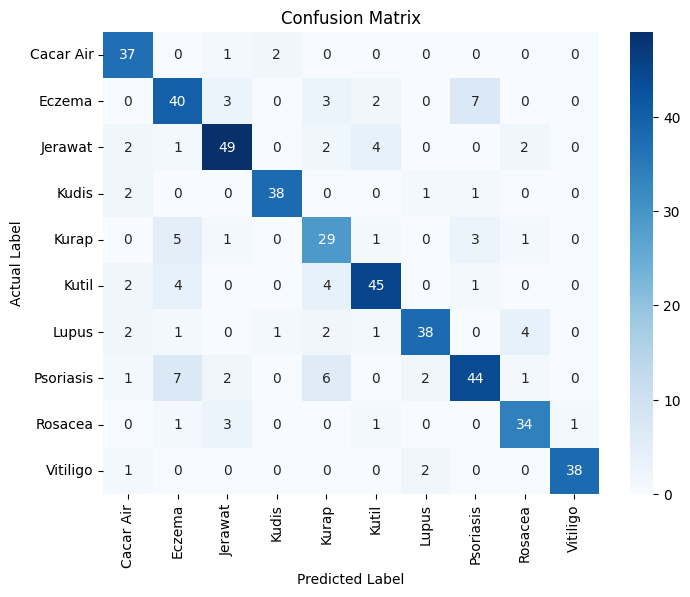

In [ ]:
classif_report = classification_report(actual_labels, predicted_labels)

conf_matrix = confusion_matrix(actual_labels, predicted_labels)

print('Classification Report:', classif_report)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True,
            fmt='d', cmap='Blues',
            xticklabels=class_name_dict,
            yticklabels=class_name_dict)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

# **5. Inferensi Model**

In [ ]:
def inference_model_test(model, target_path):
  plt.figure(figsize=(15,10), dpi=125)
  ncols = 3
  nrows = math.ceil(len(class_names)/ncols)

  # Ambil image dari dataset test
  for i, class_name in enumerate(class_names):
    target_dir = os.path.join(target_path, class_name)
    image_dir = random.choice(os.listdir(target_dir))
    full_path = os.path.join(target_dir, image_dir)
    image = mpimg.imread(full_path)

    # Lakukan visualisasi
    plt.subplot(nrows, ncols, i+1)
    plt.imshow(image)

    # Lakukan prediksi ke ML
    image_resized = tf.image.resize(image, size=[224,224])
    image_expanded = tf.expand_dims(image_resized, axis=0)
    image_preprocessed = tf.keras.applications.mobilenet.preprocess_input(image_expanded)

    prediction  = np.argmax(model.predict(image_preprocessed), axis=-1)
    preds_label = class_names[int(prediction)]
    confidence_score = np.max(model.predict(image_preprocessed))

    plt.title(f'Actual : {class_name} \nPrediction : {preds_label} dengan confidence skor : {confidence_score *100 :.2f}%')
    plt.axis('off')

  plt.tight_layout()
  plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

<ipython-input-76-199535c900d6>:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  preds_label = class_names[int(prediction)]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


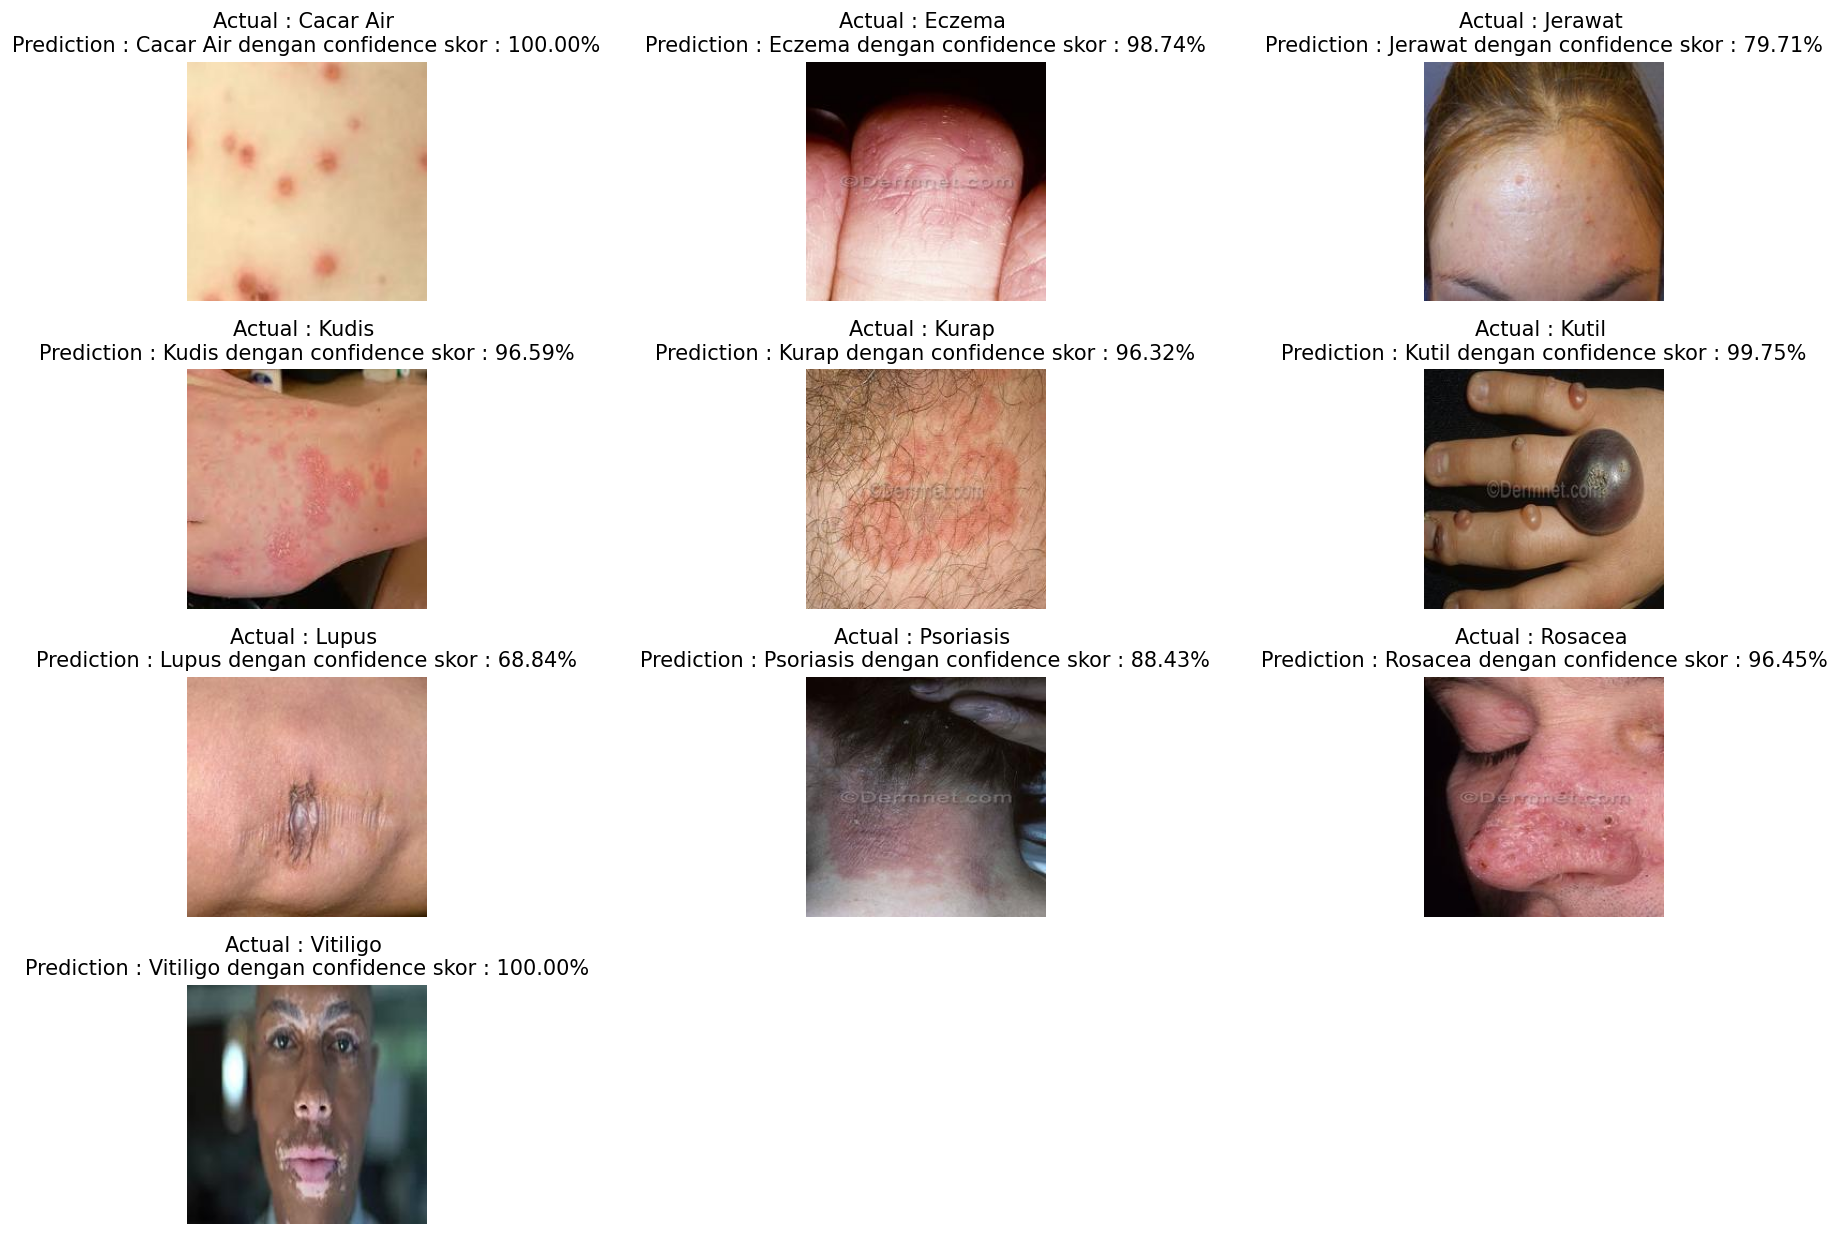

In [ ]:
inference_model_test(model, 'dataset_split/test')

In [ ]:
def inference_model_new_data(model, file_path):
  plt.figure(figsize=(15,10), dpi=125)
  ncols = 3
  nrows = math.ceil(len(class_names)/ncols)

  image = mpimg.imread(file_path)

  # Lakukan visualisasi
  plt.subplot(nrows, ncols, i+1)
  plt.imshow(image)

  # Lakukan prediksi ke ML
  image_resized = tf.image.resize(image, size=[224,224])
  image_expanded = tf.expand_dims(image_resized, axis=0)
  image_preprocessed = tf.keras.applications.mobilenet.preprocess_input(image_expanded)

  prediction  = np.argmax(model.predict(image_preprocessed, verbose=0), axis=-1)
  preds_label = class_names[int(prediction)]
  confidence_score = np.max(model.predict(image_preprocessed))

  plt.title(f'Prediction : {preds_label} \ndengan confidence skor : {confidence_score *100 :.2f}%')
  plt.axis('off')

  plt.tight_layout()
  plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


<ipython-input-16-a8ea4febb567>:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  preds_label = class_names[int(prediction)]


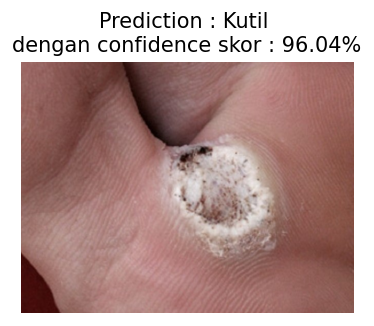

In [ ]:
inference_model_new_data(model, '/content/contoh gambar kutil dari alodokter.jpg')